In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection

In [3]:
data_D1D2=pd.read_pickle('../data/dataset/D1D2_downsampledata.pkl')

In [4]:
class pain_monitering_D1D2:
    def __init__(self,PID):
        self.PID=PID
        self.D1_rating=[]
        self.D1_time=[]
        self.D1_prediction=-1
        self.D1_confidence=-1
        self.D2_rating=[]
        self.D2_time=[]
        self.D2_prediction=-1
        self.D2_confidence=-1
    def __str__(self):
        print("participant: "+self.PID)
        print("Day 1 rating: "+str(len(self.D1_rating))+" sessions")
        print("Day 1 timing: "+str(len(self.D1_time))+" sessions")
        if self.D1_prediction!=-1 and self.D1_confidence!=-1:
            print("Day 1 prediction: "+ str(self.D1_prediction))
            print("Day 1 confidence: "+ str(self.D1_confidence))
        else:
            print("Invalid Day 1 prediction")
        if self.D2_rating!=[]:
            print("Day 2 rating: "+str(len(self.D2_rating))+" sessions")
            print("Day 2 timing: "+str(len(self.D2_time))+" sessions")
            if self.D2_prediction!=-1 and self.D2_confidence!=-1:
                print("Day 2 prediction: "+ str(self.D2_prediction))
                print("Day 2 confidence: "+ str(self.D2_confidence))
            else:
                print("Invalid Day 2 prediction")
        else:
            print("Not attending the second day")
        return ""
    def insert_rating_time_D1(self,rating,time):
        self.D1_rating=rating
        self.D1_time=time
    def insert_rating_time_D2(self,rating,time):
        self.D2_rating=rating
        self.D2_time=time
    def update_prediction_confidence_D1(self,pred,conf):
        self.D1_prediction=pred
        self.D1_confidence=conf
    def update_prediction_confidence_D2(self,pred,conf):
        self.D2_prediction=pred
        self.D2_confidence=conf
    def mean_rating(self,Day):
        rating_1D=[]
        if Day==1:
            rating_2D=self.D1_rating
        else:
            rating_2D=self.D2_rating
        for trial in rating_2D:
            rating_1D+=trial.tolist()
        return np.mean(rating_1D)
    def std(self,Day):
        rating_1D=[]
        if Day==1:
            rating_2D=self.D1_rating
        else:
            rating_2D=self.D2_rating
        for trial in rating_2D:
            rating_1D+=trial.tolist()
        return np.std(rating_1D)
    def cv(self,Day):
        return self.std(Day)/self.mean_rating(Day)
    def IQR(self, Day):
        rating_1D=[]
        if Day==1:
            rating_2D=self.D1_rating
        else:
            rating_2D=self.D2_rating
        for trial in rating_2D:
            rating_1D+=trial.tolist()
        q1 = np.percentile(rating_1D, 25)
        q3 = np.percentile(rating_1D, 75)
        iqr = q3 - q1
        return iqr
    def RMSE(self):
        rating_1D=[]
        for trial in self.D2_rating:
            rating_1D+=trial.tolist()
        rating_1D=np.array(rating_1D)
        squared_diff = (rating_1D - self.D1_prediction) ** 2
        mse = np.mean(squared_diff)
        rmse = np.sqrt(mse)
        return rmse

In [5]:
participant_list=[]
participant_list_Day1ratingpred=[]
participant_list_Day1Day2rating=[]
print("total participants: "+str(len(data_D1D2)))
for index,row in data_D1D2.iterrows():
    if row.D2_rating!=[] and row.D1_prediction!=-1:
        partcipant=pain_monitering_D1D2(row.PID)
        partcipant.insert_rating_time_D1(row.D1_rating,row.D1_time)
        partcipant.insert_rating_time_D2(row.D2_rating,row.D2_time)
        partcipant.update_prediction_confidence_D1(row.D1_prediction,row.D1_confidence)
        participant_list.append(partcipant)
    if row.D1_prediction!=-1:
        partcipant=pain_monitering_D1D2(row.PID)
        partcipant.insert_rating_time_D1(row.D1_rating,row.D1_time)
        partcipant.update_prediction_confidence_D1(row.D1_prediction,row.D1_confidence)
        participant_list_Day1ratingpred.append(partcipant)
    if row.D2_rating!=[]:
        partcipant=pain_monitering_D1D2(row.PID)
        partcipant.insert_rating_time_D1(row.D1_rating,row.D1_time)
        partcipant.insert_rating_time_D2(row.D2_rating,row.D2_time)
        participant_list_Day1Day2rating.append(partcipant)
print("D1 rating+D1 prediction+D2 rating: "+str(len(participant_list)))
print("D1 rating+D1 prediction: "+str(len(participant_list_Day1ratingpred)))
print("D1 rating+D2 rating: "+str(len(participant_list_Day1Day2rating)))

total participants: 81
D1 rating+D1 prediction+D2 rating: 41
D1 rating+D1 prediction: 61
D1 rating+D2 rating: 58


5.3725397
5.863609742099133
participant: 5a9ea9fe1ade740001b92063
Day 1 rating: 3 sessions
Day 1 timing: 3 sessions
Day 1 prediction: 5.3725397
Day 1 confidence: 6.275510199999999
Day 2 rating: 3 sessions
Day 2 timing: 3 sessions
Invalid Day 2 prediction



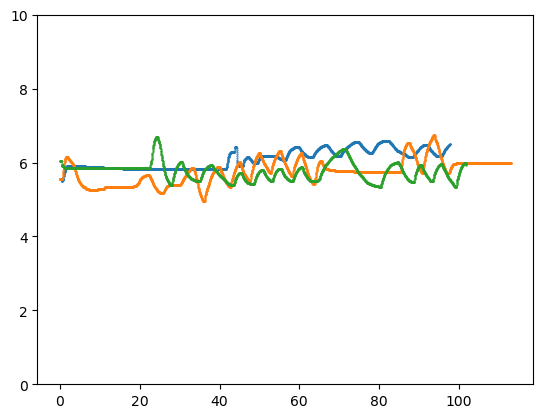

In [6]:
part_num=1
print(participant_list[part_num].D1_prediction)
print(participant_list[part_num].mean_rating(2))
print(participant_list[part_num])
plt.scatter(participant_list[part_num].D2_time[0], participant_list[part_num].D2_rating[0], s = 0.2)
plt.scatter(participant_list[part_num].D2_time[1], participant_list[part_num].D2_rating[1], s = 0.2)
plt.scatter(participant_list[part_num].D2_time[2], participant_list[part_num].D2_rating[2], s = 0.2)
plt.ylim(0,10)
plt.show()

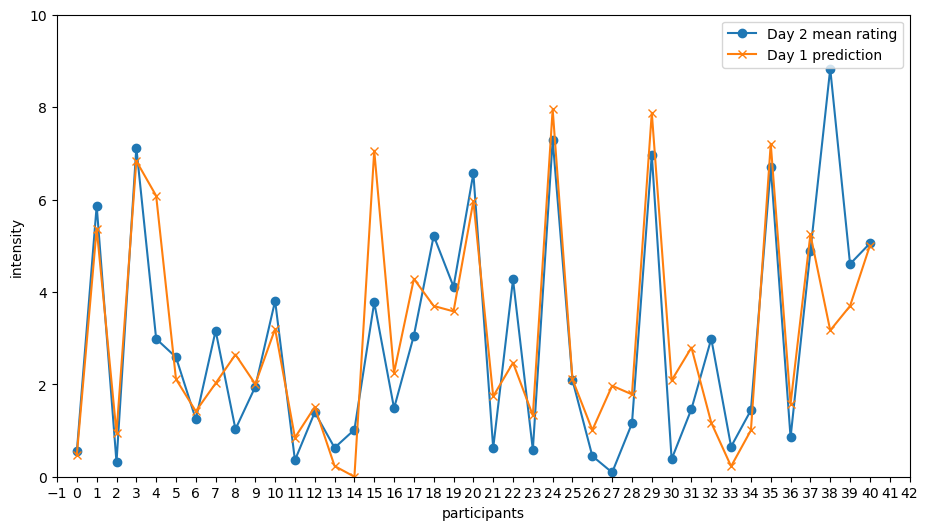

In [6]:
mean_rating_list=[]
D1_prediction_list=[]
for part in participant_list:
    D1_prediction_list.append(part.D1_prediction)
    mean_rating_list.append(part.mean_rating(2))
x=np.arange(len(mean_rating_list))
plt.figure(figsize=(11, 6))
plt.plot(x, mean_rating_list, label = "Day 2 mean rating", marker='o')
plt.plot(x, D1_prediction_list, label = "Day 1 prediction", marker='x')
plt.xlabel('participants')
plt.ylabel('intensity')
plt.ylim(0,10)
plt.xlim(-1,42)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.legend()
plt.show()

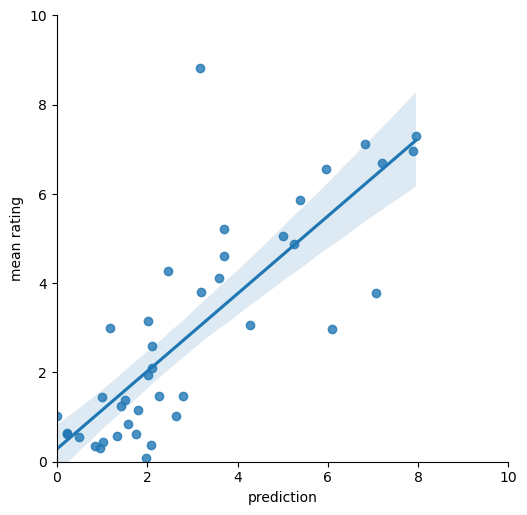

In [7]:
mean_pred=pd.DataFrame({
    'Day1_pred':D1_prediction_list,
    'Day2_mean':mean_rating_list
})
ax = sns.lmplot(x="Day1_pred", y="Day2_mean", data=mean_pred)
plt.xlabel('prediction')
plt.ylabel('mean rating')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [8]:
stats.pearsonr(mean_pred['Day1_pred'], mean_pred['Day2_mean'])

(0.8091997223461552, 1.5220268289179038e-10)

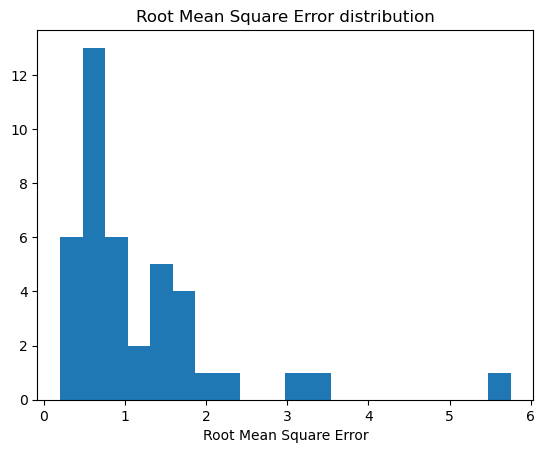

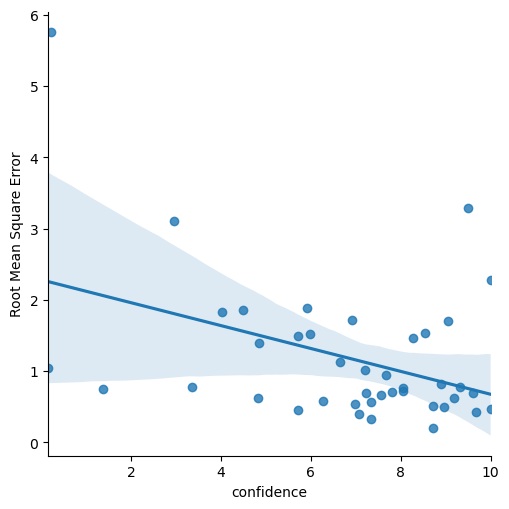

In [7]:
rmse_list=[]
D1_confidence_list=[]
for part in participant_list:
    D1_confidence_list.append(part.D1_confidence)
    rmse_list.append(part.RMSE())
plt.xlabel("Root Mean Square Error")
plt.title("Root Mean Square Error distribution")
plt.hist(rmse_list, bins=20)
plt.show()
rmse_conf=pd.DataFrame({
    'Day1_conf':D1_confidence_list,
    'Day2_rmse':rmse_list
})
ax = sns.lmplot(x="Day1_conf", y="Day2_rmse", data=rmse_conf)
plt.xlabel('confidence')
plt.ylabel('Root Mean Square Error')
# plt.xlim(0,10)
# plt.ylim(0,10)
plt.show()

In [12]:
stats.pearsonr(rmse_conf['Day1_conf'], rmse_conf['Day2_rmse'])

(-0.4005695254775518, 0.009452070234361839)

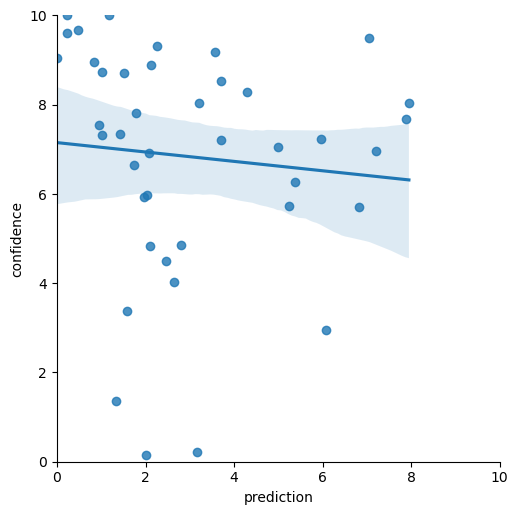

In [9]:
pred_conf=pd.DataFrame({
    'Day1_conf':D1_confidence_list,
    'Day1_pred':D1_prediction_list
})
ax = sns.lmplot(x="Day1_pred", y="Day1_conf", data=pred_conf)
plt.xlabel('prediction')
plt.ylabel('confidence')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [12]:
stats.pearsonr(pred_conf['Day1_pred'], pred_conf['Day1_conf'])

(-0.09338786850640925, 0.5614068547687243)

In [8]:
pred_conf_mean_rmse=pd.DataFrame({
    'Day1_pred':D1_prediction_list,
    'Day2_mean':mean_rating_list,
    'Day1_conf':D1_confidence_list,
    'Day2_rmse':rmse_list
})
cormat = pred_conf_mean_rmse.corr()
round(cormat,2)


,Day1_pred,Day2_mean,Day1_conf,Day2_rmse
Day1_pred,1.00,0.81,-0.09,0.15
Day2_mean,0.81,1.00,-0.14,0.28
Day1_conf,-0.09,-0.14,1.00,-0.40
Day2_rmse,0.15,0.28,-0.40,1.00


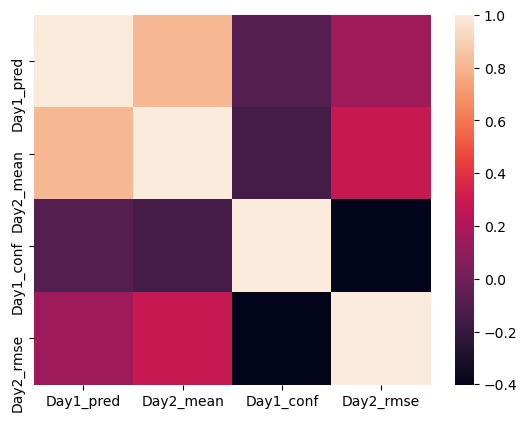

In [16]:
sns.heatmap(cormat)
plt.show()

In [8]:
acc_score_list=[10]*len(rmse_list)
for i in range(len(acc_score_list)):
    acc_score_list[i]-=rmse_list[i]
cv_list=[]
for part in participant_list:
    cv_list.append(part.cv(2))
iqr_list=[]
for part in participant_list:
    iqr_list.append(part.IQR(2))
pred_conf_mean_acc=pd.DataFrame({
    'Day1_pred':D1_prediction_list,
    'Day2_mean':mean_rating_list,
    'Day1_conf':D1_confidence_list,
    'acc':acc_score_list,
    'cv':cv_list,
    'IQR':iqr_list
})
cormat = pred_conf_mean_acc.corr()
round(cormat,2)

,Day1_pred,Day2_mean,Day1_conf,acc,cv,IQR
Day1_pred,1.00,0.81,-0.09,-0.15,-0.54,0.06
Day2_mean,0.81,1.00,-0.14,-0.28,-0.56,0.12
Day1_conf,-0.09,-0.14,1.00,0.40,0.04,-0.12
acc,-0.15,-0.28,0.40,1.00,-0.06,-0.04
cv,-0.54,-0.56,0.04,-0.06,1.00,0.08
IQR,0.06,0.12,-0.12,-0.04,0.08,1.00


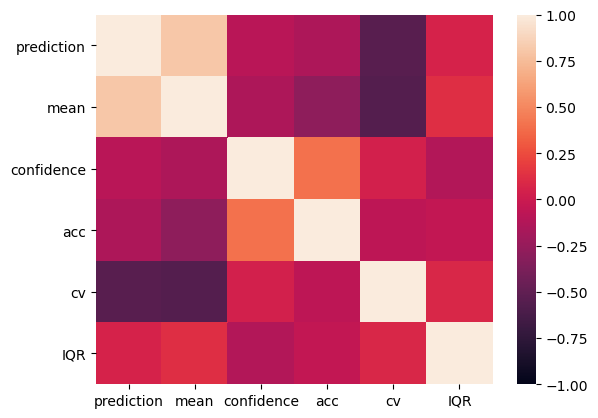

In [11]:
x_axis_labels=["prediction","mean","confidence","acc","cv","IQR"]
y_axis_labels=["prediction","mean","confidence","acc","cv","IQR"]
sns.heatmap(cormat, vmin=-1, vmax=1,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

In [12]:
pvalues = pred_conf_mean_acc.corr(method=lambda x, y: pearsonr(x, y)[1])
round(pvalues,2)

,Day1_pred,Day2_mean,Day1_conf,acc,cv,IQR
Day1_pred,1.00,0.00,0.56,0.36,0.00,0.72
Day2_mean,0.00,1.00,0.37,0.07,0.00,0.45
Day1_conf,0.56,0.37,1.00,0.01,0.79,0.45
acc,0.36,0.07,0.01,1.00,0.69,0.80
cv,0.00,0.00,0.79,0.69,1.00,0.62
IQR,0.72,0.45,0.45,0.80,0.62,1.00


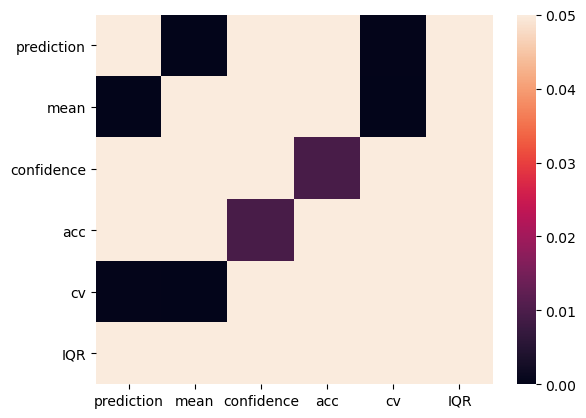

In [13]:
sns.heatmap(pvalues, vmin=0, vmax=0.05,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

In [73]:
class pain_pred_acc_clinical:
    def __init__(self,PID):
        self.PID=PID
        self.mean=np.nan
        self.std=np.nan
        self.cv=np.nan
        self.IQR=np.nan
        self.prediction=np.nan
        self.confidence=np.nan
        self.acc=np.nan
        self.nstate_D1=np.nan
        self.hmmscore_D1=np.nan
        self.log_D1=np.nan
        self.aic_D1=np.nan
        self.bic_D1=np.nan
        self.nstate_D2=np.nan
        self.hmmscore_D2=np.nan
        self.log_D2=np.nan
        self.aic_D2=np.nan
        self.bic_D2=np.nan
        self.nstate_D2_D1=np.nan
        self.hmmscore_D2_D1=np.nan
        self.log_D2_D1=np.nan
        self.aic_D2_D1=np.nan
        self.bic_D2_D1=np.nan

        self.msk=np.nan
        self.BPI_severity=np.nan
        self.BPI_interference=np.nan
        self.start_total=np.nan
        self.start_sub=np.nan
        self.pcs_total=np.nan
        self.pcs_rumination=np.nan
        self.pcs_magnification=np.nan
        self.pcs_helplessness=np.nan
        self.GAD7=np.nan
        self.PHQ8=np.nan
    def __str__(self):
        print("participant: "+self.PID,end=' ')
        print("mean rating: "+str(self.mean),end=' ')
        print("standard divation: "+str(self.std),end=' ')
        print("Coefficient of Variation: "+str(self.cv),end=' ')
        print("Interquartile Range: "+str(self.IQR),end=' ')
        print("prediction: "+str(self.prediction),end=' ')
        print("confidence: "+str(self.confidence),end=' ')
        print("accuracy: "+str(self.acc),end=' ')
        print("nstate: "+str(self.nstate_D2),end=' ')
        print("hmm score: "+str(self.hmmscore_D2),end=' ')
        print("log: "+str(self.log_D2),end=' ')
        print("aic: "+str(self.aic_D2),end=' ')
        print("bic: "+str(self.bic_D2),end=' ')

        print("msk: "+str(self.msk),end=' ')
        print("BPI severity: "+str(self.BPI_severity),end=' ')
        print("BPI interference: "+str(self.BPI_interference),end=' ')
        print("sTarT total: "+str(self.start_total),end=' ')
        print("sTarT sub score: "+str(self.start_sub),end=' ')
        print("pcs total: "+str(self.pcs_total),end=' ')
        print("pcs rumination: "+str(self.pcs_rumination),end=' ')
        print("pcs magnification: "+str(self.pcs_magnification),end=' ')
        print("pcs helplessness: "+str(self.pcs_helplessness),end=' ')
        print("GAD7: "+str(self.GAD7),end=' ')
        print("PHQ8: "+str(self.PHQ8))
        return ""
    def update(self,mean,std,cv,IQR,prediction,confidence,acc,nstate_d1,hmmscore_d1,log_d1,aic_d1,bic_d1,\
               nstate_d2,hmmscore_d2,log_d2,aic_d2,bic_d2,\
                msk,BPI_severity,BPI_interference,start_total,start_sub,pcs_total,\
                pcs_rumination,pcs_magnification,pcs_helplessness,GAD7,PHQ8):
        self.mean=mean;self.std=std;self.cv=cv;self.IQR=IQR
        self.prediction=prediction;self.confidence=confidence;self.acc=acc
        self.nstate_D1=nstate_d1;self.hmmscore_D1=hmmscore_d1
        self.log_D1=log_d1;self.aic_D1=aic_d1;self.bic_D1=bic_d1
        self.nstate_D2=nstate_d2;self.hmmscore_D2=hmmscore_d2
        self.log_D2=log_d2;self.aic_D2=aic_d2;self.bic_D2=bic_d2
        self.nstate_D2_D1=nstate_d2-nstate_d1;self.hmmscore_D2_D1=hmmscore_d2-hmmscore_d1
        self.log_D2_D1=log_d2-log_d1;self.aic_D2_D1=aic_d2-aic_d1;self.bic_D2_D1=bic_d2-bic_d1
        if not np.isnan(msk):
            self.msk=msk
        if not np.isnan(BPI_severity):
            self.BPI_severity=BPI_severity
        if not np.isnan(BPI_interference):
            self.BPI_interference=BPI_interference
        if not np.isnan(start_total):
            self.start_total=start_total
        if not np.isnan(start_sub):
            self.start_sub=start_sub
        if not np.isnan(pcs_total):
            self.pcs_total=pcs_total
        if not np.isnan(pcs_rumination):
            self.pcs_rumination=pcs_rumination
        if not np.isnan(pcs_magnification):
            self.pcs_magnification=pcs_magnification
        if not np.isnan(pcs_helplessness):
            self.pcs_helplessness=pcs_helplessness
        if not np.isnan(GAD7):
            self.GAD7=GAD7
        if not np.isnan(PHQ8):
            self.PHQ8=PHQ8
        return

In [74]:
df_BPI_START = pd.read_csv('../data/questionnaire/questionnaire_BPI_START_new_add_dup.csv')
df_PCS_GAD_PHQ=pd.read_csv('../data/questionnaire/questionnaire_PCS_GAD7_PHQ9.csv')
df_MSK=pd.read_csv('../data/questionnaire/qualtrics_05_excludeother_score.csv')
print(len(df_BPI_START))
print(len(df_PCS_GAD_PHQ))
print(len(df_MSK))

69
67
124


In [75]:
df_hmm=pd.read_pickle('../data/part_score_sharon/result.pkl')
print(len(df_hmm))

81


In [76]:
participant_clinical_list=[]
print(len(participant_list))
for part in participant_list:
    found_1=False
    for index,row in df_BPI_START.iterrows():
        if row.PROLIFIC_PID==part.PID:
            bpi_s=row['BPI Mean Severity Score']
            bpi_i=row['BPI Mean Pain Interference Score']
            start_t=row['START total score']
            start_sub=row['START sub score']
            found_1=True
            break
    if found_1==False:
        print(part.PID+" Not Found(BPI START)")
    found_2=False
    for index,row in df_PCS_GAD_PHQ.iterrows():
        if row.PROLIFIC_PID==part.PID:
            pcs_t=row['Total PCS Score']
            pcs_r=row['PCS Rumination Score']
            pcs_m=row['PCS Magnification Score']
            pcs_h=row['PCS Helplessness Score']
            gad7=row['Total GAD7 Score']
            phq=row['Total PHQ9 Score']
            found_2=True
            break
    if found_2==False:
        print(part.PID+" Not Found (PCS GAD PHQ)")
    found_3=False
    for index,row in df_MSK.iterrows():
        if row.PROLIFIC_PID==part.PID:
            msk=row['Score']
            found_3=True
            break
    if found_3==False:
        print(part.PID+" Not Found (MSK)")
    found_4=False
    for index,row in df_hmm.iterrows():
        if row.PID==part.PID:
            if np.isnan(row['nstate_D2'])==False:
                nstate_D1=row['nstate_D1']
                hmmscore_D1=row['score_D1']
                log_D1=row['log_D1']
                aic_D1=row['aic_D1']
                bic_D1=row['bic_D1']
                nstate_D2=row['nstate_D2']
                hmmscore_D2=row['score_D2']
                log_D2=row['log_D2']
                aic_D2=row['aic_D2']
                bic_D2=row['bic_D2']
                found_4=True
                break
    if found_4==False:
        print(part.PID+" Not Found (HMM)")
    if found_1 and found_2 and found_3 and found_4:
        part_clinical=pain_pred_acc_clinical(part.PID)
        part_clinical.update(mean=part.mean_rating(2),std=part.std(2),cv=part.cv(2),IQR=part.IQR(2),\
                            prediction=part.D1_prediction,confidence=part.D1_confidence,acc=10-part.RMSE(),\
                                nstate_d1=nstate_D1,hmmscore_d1=hmmscore_D1,log_d1=log_D1,aic_d1=aic_D1,bic_d1=bic_D1,\
                                nstate_d2=nstate_D2,hmmscore_d2=hmmscore_D2,log_d2=log_D2,aic_d2=aic_D2,bic_d2=bic_D2,\
                                msk=msk,BPI_severity=bpi_s,BPI_interference=bpi_i,start_total=start_t,start_sub=start_sub,\
                                    pcs_total=pcs_t,pcs_rumination=pcs_r,pcs_magnification=pcs_m,pcs_helplessness=pcs_h,\
                                        GAD7=gad7,PHQ8=phq)
        participant_clinical_list.append(part_clinical)
print(len(participant_clinical_list))

41
5a9ea9fe1ade740001b92063 Not Found(BPI START)
6235d96c087939dba5586d97 Not Found(BPI START)
6148a15571fc73becd361f1b Not Found(BPI START)
5bc5f36b8d83e10001724601 Not Found(BPI START)
58fa36995214e3000193281c Not Found(BPI START)
36


In [77]:
mean_list=[];std_list=[];cv_list=[];IQR_list=[]
prediction_list=[];confidence_list=[];acc_list=[]
nstate_D1_list=[];hmmscore_D1_list=[];log_D1_list=[];aic_D1_list=[];bic_D1_list=[]
nstate_D2_list=[];hmmscore_D2_list=[];log_D2_list=[];aic_D2_list=[];bic_D2_list=[]
nstate_D2_D1_list=[];hmmscore_D2_D1_list=[];log_D2_D1_list=[];aic_D2_D1_list=[];bic_D2_D1_list=[]

msk_list=[];BPI_severity_list=[];BPI_interference_list=[]
start_total_list=[];start_sub_list=[]
pcs_total_list=[];pcs_rumination_list=[];pcs_magnification_list=[];pcs_helplessness_list=[]
GAD7_list=[];PHQ8_list=[]
for part in participant_clinical_list:
    if np.isnan(part.mean) or np.isnan(part.std) or np.isnan(part.cv) or np.isnan(part.IQR) or\
        np.isnan(part.prediction) or np.isnan(part.confidence) or np.isnan(part.acc) or\
        np.isnan(part.nstate_D1) or np.isnan(part.nstate_D2) or\
            np.isnan(part.msk) or np.isnan(part.BPI_severity) or np.isnan(part.BPI_interference) or\
            np.isnan(part.start_total) or np.isnan(part.start_sub) or \
                np.isnan(part.pcs_total) or np.isnan(part.pcs_rumination) or np.isnan(part.pcs_magnification) or np.isnan(part.pcs_helplessness) or\
                    np.isnan(part.GAD7) or np.isnan(part.PHQ8):
        print(part.PID+" invalid")
        print(part)
        continue
    mean_list.append(part.mean)
    std_list.append(part.std)
    cv_list.append(part.cv)
    IQR_list.append(part.IQR)
    prediction_list.append(part.prediction)
    confidence_list.append(part.confidence)
    acc_list.append(part.acc)
    nstate_D1_list.append(part.nstate_D1)
    hmmscore_D1_list.append(part.hmmscore_D1)
    log_D1_list.append(part.log_D1)
    aic_D1_list.append(part.aic_D1)
    bic_D1_list.append(part.bic_D1)
    nstate_D2_list.append(part.nstate_D2)
    hmmscore_D2_list.append(part.hmmscore_D2)
    log_D2_list.append(part.log_D2)
    aic_D2_list.append(part.aic_D2)
    bic_D2_list.append(part.bic_D2)
    nstate_D2_D1_list.append(part.nstate_D2_D1)
    hmmscore_D2_D1_list.append(part.hmmscore_D2_D1)
    log_D2_D1_list.append(part.log_D2_D1)
    aic_D2_D1_list.append(part.aic_D2_D1)
    bic_D2_D1_list.append(part.bic_D2_D1)

    msk_list.append(part.msk)
    BPI_severity_list.append(part.BPI_severity)
    BPI_interference_list.append(part.BPI_interference)
    start_total_list.append(part.start_total)
    start_sub_list.append(part.start_sub)
    pcs_total_list.append(part.pcs_total)
    pcs_rumination_list.append(part.pcs_rumination)
    pcs_magnification_list.append(part.pcs_magnification)
    pcs_helplessness_list.append(part.pcs_helplessness)
    GAD7_list.append(part.GAD7)
    PHQ8_list.append(part.PHQ8)


600606925db9c892b3939202 invalid
participant: 600606925db9c892b3939202 mean rating: 0.3096104417189745 standard divation: 0.18337347756647718 Coefficient of Variation: 0.5922716189685896 Interquartile Range: 0.40613614160271533 prediction: 0.9452332200000001 confidence: 7.55632779 accuracy: 9.338454726761265 nstate: 9.0 hmm score: 0.3297516913568511 log: -493.25935624588044 aic: 1372.3187124917608 bic: 2354.996614270646 msk: 38.0 BPI severity: 2.0 BPI interference: 1.0 sTarT total: nan sTarT sub score: nan pcs total: 11.0 pcs rumination: 4.0 pcs magnification: 2.0 pcs helplessness: 5.0 GAD7: 5.0 PHQ8: 9.0

61268bfae35dcb011f6081b5 invalid
participant: 61268bfae35dcb011f6081b5 mean rating: 3.7738086244312123 standard divation: 0.3037987675143765 Coefficient of Variation: 0.08050190079794123 Interquartile Range: 0.3866466493028091 prediction: 7.05683766 confidence: 9.50232214 accuracy: 6.702944747273564 nstate: 9.0 hmm score: 0.3795013401239048 log: -921.2786218424484 aic: 2269.757243684

In [15]:
len(PHQ8_list)

29

In [78]:
clincal_basic=pd.DataFrame({
    'mean':mean_list,
    'std':std_list,
    'cv':cv_list,
    'IQR':IQR_list,
    'prediction':prediction_list,
    'confidence':confidence_list,
    'accuracy':acc_list,
    'nstate_D1':nstate_D1_list,
    'hmmscore_D1':hmmscore_D1_list,
    'log_D1':log_D1_list,
    'aic_D1':aic_D1_list,
    'bic_D1':bic_D1_list,
    'nstate_D2':nstate_D2_list,
    'hmmscore_D2':hmmscore_D2_list,
    'log_D2':log_D2_list,
    'aic_D2':aic_D2_list,
    'bic_D2':bic_D2_list,
    'nstate_D2_D1':nstate_D2_D1_list,
    'hmmscore_D2_D1':hmmscore_D2_D1_list,
    'log_D2_D1':log_D2_D1_list,
    'aic_D2_D1':aic_D2_D1_list,
    'bic_D2_D1':bic_D2_D1_list,
    
    'MSK':msk_list,
    'BPI Severity':BPI_severity_list,
    'BPI Interference':BPI_interference_list,
    'sTarT total':start_total_list,
    'sTarT sub':start_sub_list,
    'PCS total':pcs_total_list,
    'PCS Rumination':pcs_rumination_list,
    'PCS Magnification':pcs_magnification_list,
    'PCS Helplessness':pcs_helplessness_list,
    'GAD7':GAD7_list,
    'PHQ8':PHQ8_list
    })
cormat = clincal_basic.corr()
pvalues = clincal_basic.corr(method=lambda x, y: pearsonr(x, y)[1])
round(cormat,2)

,mean,std,cv,IQR,prediction,confidence,accuracy,nstate_D1,hmmscore_D1,log_D1,...,BPI Severity,BPI Interference,sTarT total,sTarT sub,PCS total,PCS Rumination,PCS Magnification,PCS Helplessness,GAD7,PHQ8
mean,1.00,0.06,-0.54,0.23,0.89,0.06,0.04,0.32,0.29,-0.27,...,0.73,0.77,0.77,0.70,0.64,0.51,0.54,0.72,0.32,0.33
std,0.06,1.00,0.44,0.83,-0.09,-0.00,-0.43,0.03,-0.00,0.09,...,-0.00,0.16,0.12,0.08,0.31,0.31,0.19,0.33,0.10,0.10
cv,-0.54,0.44,1.00,0.09,-0.54,0.02,-0.32,-0.29,-0.21,0.23,...,-0.47,-0.45,-0.32,-0.31,-0.25,-0.13,-0.26,-0.31,-0.05,0.03
IQR,0.23,0.83,0.09,1.00,0.12,-0.16,-0.34,0.14,0.11,-0.03,...,0.21,0.36,0.22,0.19,0.47,0.39,0.40,0.51,0.16,0.07
prediction,0.89,-0.09,-0.54,0.12,1.00,-0.18,-0.11,0.40,0.36,-0.30,...,0.81,0.72,0.63,0.55,0.51,0.37,0.41,0.61,0.28,0.22
confidence,0.06,-0.00,0.02,-0.16,-0.18,1.00,0.25,-0.49,-0.54,0.40,...,-0.09,-0.06,0.09,0.16,-0.14,-0.10,-0.24,-0.12,-0.15,0.09
accuracy,0.04,-0.43,-0.32,-0.34,-0.11,0.25,1.00,-0.17,-0.36,0.33,...,-0.07,0.02,0.11,0.21,0.04,0.02,0.14,0.00,0.02,0.23
nstate_D1,0.32,0.03,-0.29,0.14,0.40,-0.49,-0.17,1.00,0.80,-0.65,...,0.19,0.27,0.15,0.11,0.34,0.26,0.32,0.37,0.19,0.11
hmmscore_D1,0.29,-0.00,-0.21,0.11,0.36,-0.54,-0.36,0.80,1.00,-0.92,...,0.13,0.15,0.11,-0.02,0.19,0.11,0.16,0.24,-0.07,-0.25
log_D1,-0.27,0.09,0.23,-0.03,-0.30,0.40,0.33,-0.65,-0.92,1.00,...,-0.09,-0.12,-0.12,-0.03,-0.16,-0.14,-0.12,-0.18,0.05,0.26


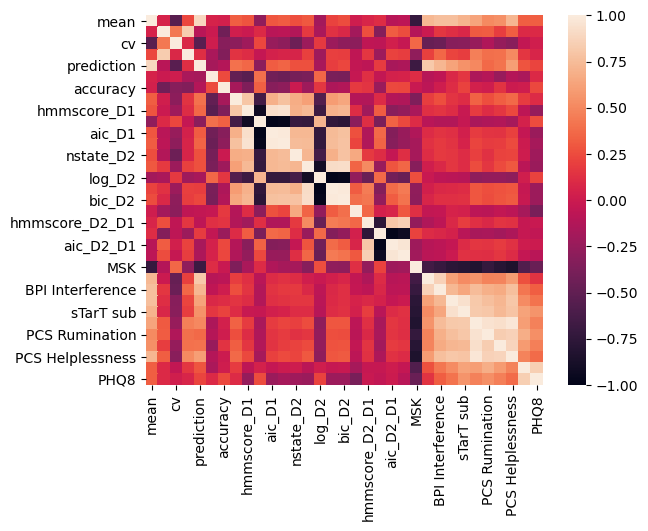

In [79]:
sns.heatmap(cormat, vmin=-1, vmax=1)
plt.show()

In [80]:
cormat_meantohmm=cormat.iloc[0:22,0:22]
# cormat_part_transposed = cormat_part.transpose()
# round(cormat_meantohmm,2)
cormat_meantohmm.to_csv('../data/dataset/correlation_meantohmm.csv')
pvalues_meantohmm=pvalues.iloc[0:22,0:22]
pvalues_meantohmm.to_csv('../data/dataset/pvalues_meantohmm.csv')

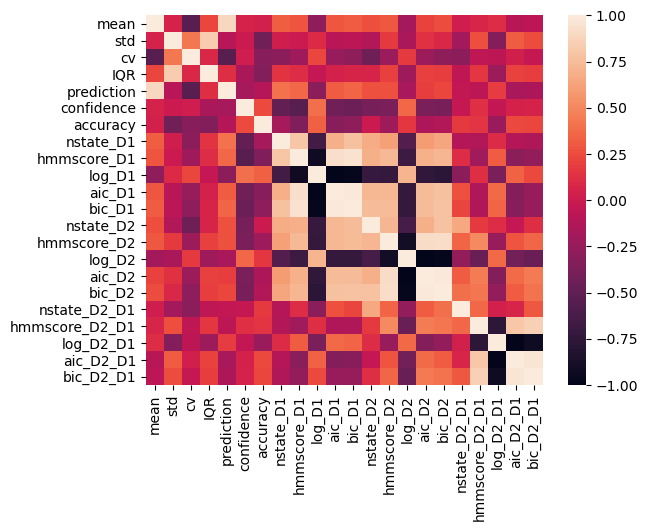

In [81]:
# fig,axis=plt.subplots(1,2)
sns.heatmap(cormat_meantohmm, vmin=-1, vmax=1)
# sns.heatmap(pvalues_meantohmm, vmax=0.05,ax=axis[1])
plt.show()

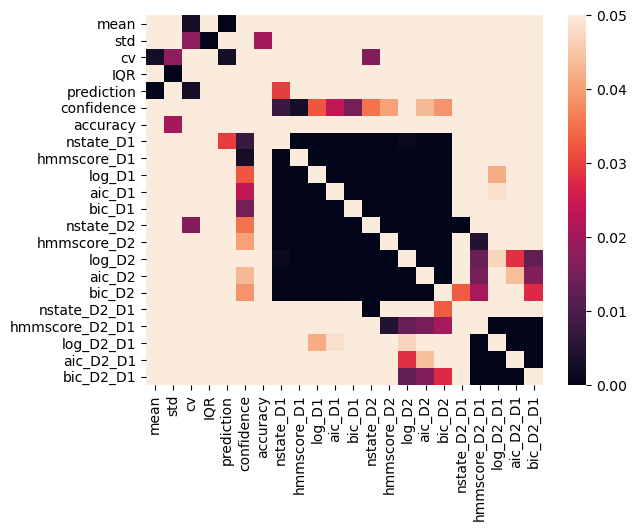

In [82]:
sns.heatmap(pvalues_meantohmm, vmax=0.05)
plt.show()

In [19]:
def p_value_correction_square(p_value_matrix,standard_alpha):
    p_values_list = p_value_matrix[np.triu_indices_from(p_value_matrix, k=1)]
    # print("p_values_list: "+str(p_values_list))
    num_tests = len(p_values_list)
    sorted_indices = np.argsort(p_values_list)
    sorted_p_values = p_values_list[sorted_indices]
    adjusted_alpha = standard_alpha / np.arange(num_tests, 0, -1)  # Adjusted significance levels
    rejected_indices = sorted_indices[sorted_p_values <= adjusted_alpha]
    # print(p_values)
    # print(correlation_matrix)
    # Create a matrix to store the corrected significance levels
    corrected_matrix = np.ones_like(p_value_matrix)
    # print(corrected_matrix)
    # Populate the corrected significance levels in the matrix
    for index in rejected_indices:
        # print("index: "+str(index))
        tri_index=np.triu_indices_from(p_value_matrix, k=1)
        row=tri_index[0][index]
        col = tri_index[1][index]
        # print("row: "+str(row)+", col: "+str(col))
        corrected_matrix[row, col] = p_values_list[index]

    # Fill the lower triangular part of the matrix symmetrically
    corrected_matrix = corrected_matrix + corrected_matrix.T-np.ones_like(p_value_matrix)
    return corrected_matrix

# cor_matrix = np.array([
#     [1.0,   0.002,  0.10,   0.003,  0.008],
#     [0.002, 1.0,    0.005,  0.004,  0.01],
#     [0.10,  0.005,  1.0,    0.4,    0.03],
#     [0.003, 0.004,  0.4,    1.0,    0.04],
#     [0.008, 0.01,   0.03,   0.04,   1.0]
# ])
# # random_matrix = np.random.rand(5, 5)
# d=p_value_correction_square(cor_matrix,0.05)
# print("d:")
# print(d)

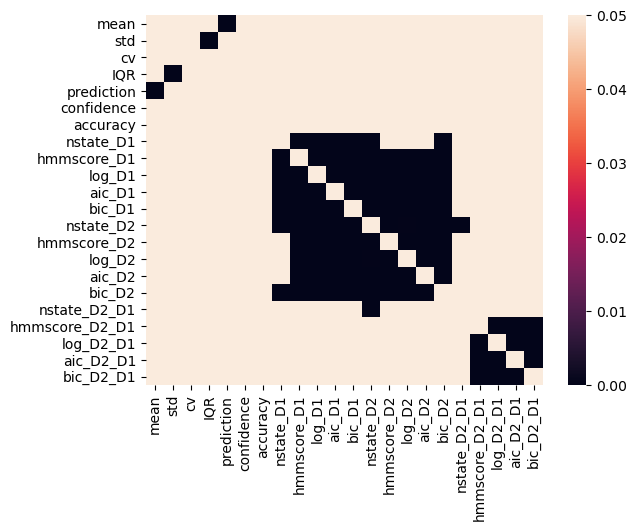

In [20]:
correctred_pvalue_meantohmm=p_value_correction_square(pvalues_meantohmm.to_numpy(),0.05)
correctred_pvalue_meantohmm_df = pd.DataFrame(data = correctred_pvalue_meantohmm,\
    index = pvalues_meantohmm.index,\
        columns = pvalues_meantohmm.columns)
sns.heatmap(correctred_pvalue_meantohmm_df, vmax=0.05)
plt.show()

In [70]:
cormat_paratoclinical=cormat.iloc[22:,0:22]
# cormat_part_transposed = cormat_part.transpose()
# round(cormat_meantohmm,2)
cormat_paratoclinical.to_csv('../data/dataset/correlation_paratoclinical.csv')
pvalues_paratoclinical=pvalues.iloc[22:,0:22]
pvalues_paratoclinical.to_csv('../data/dataset/pvalues_paratoclinical.csv')

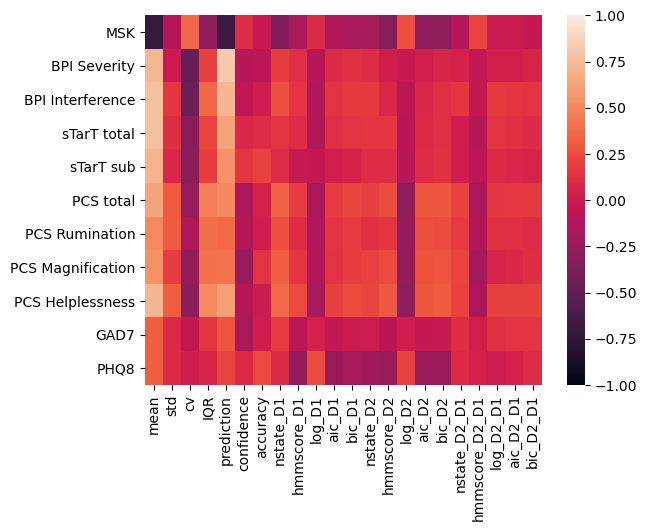

In [71]:
# fig,axis=plt.subplots(1,2)
sns.heatmap(cormat_paratoclinical, vmin=-1, vmax=1)
# sns.heatmap(pvalues_meantohmm, vmax=0.05,ax=axis[1])
plt.show()

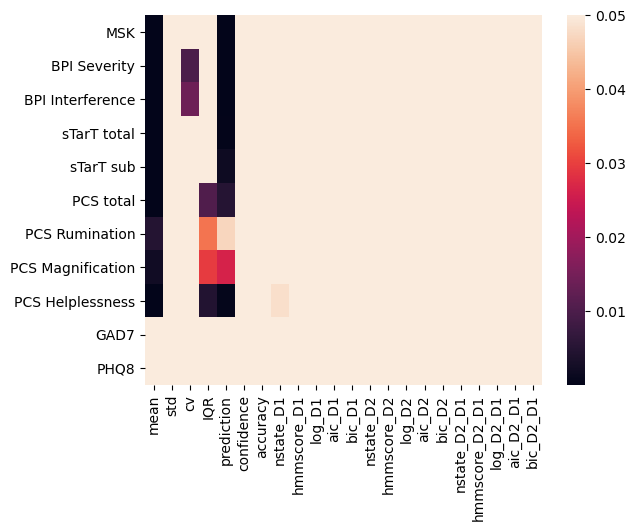

In [72]:
sns.heatmap(pvalues_paratoclinical, vmax=0.05)
plt.show()

In [26]:
def p_value_correction_rectangle(p_value_matrix,standard_alpha):
    p_values_list = p_value_matrix.flatten()
    # print("p_values_list: "+str(p_values_list))
    num_tests = len(p_values_list)
    sorted_indices = np.argsort(p_values_list)
    # print(sorted_indices)
    sorted_p_values = p_values_list[sorted_indices]
    # print(sorted_p_values)
    adjusted_alpha = standard_alpha / np.arange(num_tests, 0, -1)  # Adjusted significance levels
    # print(adjusted_alpha)
    rejected_indices = sorted_indices[sorted_p_values <= adjusted_alpha]
    # print(rejected_indices)
    # Create a matrix to store the corrected significance levels
    corrected_matrix = np.ones_like(p_value_matrix)
    # print(corrected_matrix)
    # Populate the corrected significance levels in the matrix
    # tri_index=np.triu_indices_from(p_value_matrix, k=1)
    num_rows, num_cols = p_value_matrix.shape
    x_indices, y_indices = np.meshgrid(np.arange(num_cols), np.arange(num_rows))
    tri_index = np.vstack((y_indices.flatten(),x_indices.flatten()))
    # print(tri_index)
    for index in rejected_indices:
        # print("index: "+str(index))
        row=tri_index[0][index]
        col = tri_index[1][index]
        # print("row: "+str(row)+", col: "+str(col))
        corrected_matrix[row, col] = p_values_list[index]

    # # Fill the lower triangular part of the matrix symmetrically
    # corrected_matrix = corrected_matrix 
    return corrected_matrix
# cor_matrix = np.array([
#     [1.0,   0.002,  0.10],
#     [0.002, 0.003,  0.05],
#     [0.10,  0.005,  1.0],
#     [0.003, 0.004,  0.4],
#     [0.008, 0.01,   0.03]
# ])
# # random_matrix = np.random.rand(5, 5)
# d=p_value_correction_rectangle(cor_matrix,0.05)
# print("d:")
# print(d)

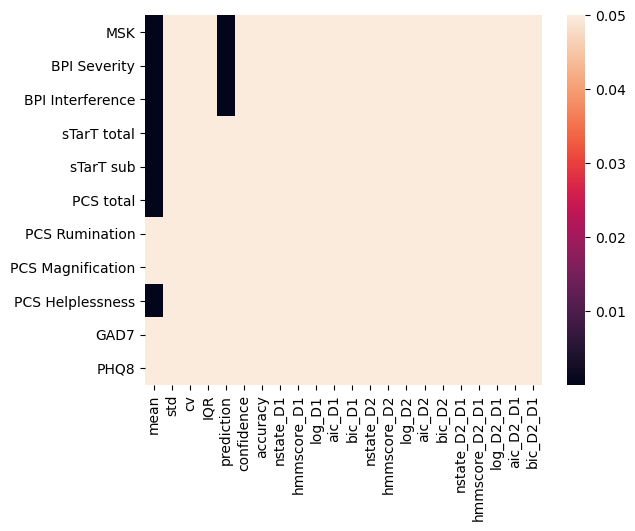

In [27]:
correctred_pvalue_paratoclinical=p_value_correction_rectangle(pvalues_paratoclinical.to_numpy(),0.05)
correctred_pvalue_paratoclinical_df = pd.DataFrame(data = correctred_pvalue_paratoclinical,\
    index = pvalues_paratoclinical.index,\
        columns = pvalues_paratoclinical.columns)
sns.heatmap(correctred_pvalue_paratoclinical_df, vmax=0.05)
plt.show()

In [14]:
clincal_basic_reduce=pd.DataFrame({
    'mean':mean_list,
    'std': std_list,
    'cv':cv_list,
    'prediction':prediction_list,
    'confidence':confidence_list,
    'accuracy': acc_list,
    'nstate_D1':nstate_D1_list,
    'hmmscore_D1':hmmscore_D1_list,
    'nstate_D2':nstate_D2_list,
    'hmmscore_D2':hmmscore_D2_list,
    'BPI Severity':BPI_severity_list,
    'BPI Interference':BPI_interference_list,
    'PCS total':pcs_total_list,
    'PCS Rumination':pcs_rumination_list,
    'PCS Magnification':pcs_magnification_list,
    'PCS Helplessness':pcs_helplessness_list,
    'GAD7':GAD7_list,
    'PHQ8':PHQ8_list
    })
cormat_reduce = clincal_basic_reduce.corr()
pvalues_reduce = clincal_basic_reduce.corr(method=lambda x, y: pearsonr(x, y)[1])
# round(cormat,2)

In [15]:
cormat_meantohmm_reduce=cormat_reduce.iloc[0:6,0:6]
cormat_meantohmm_reduce.to_csv('../data/dataset/correlation_meantohmm_reduce.csv')
pvalues_meantohmm_reduce=pvalues_reduce.iloc[0:6,0:6]
pvalues_meantohmm_reduce.to_csv('../data/dataset/pvalues_meantohmm_reduce.csv')
round(cormat_meantohmm_reduce,2)

,mean,std,cv,prediction,confidence,accuracy
mean,1.00,0.06,-0.54,0.89,0.06,0.04
std,0.06,1.00,0.44,-0.09,-0.00,-0.43
cv,-0.54,0.44,1.00,-0.54,0.02,-0.32
prediction,0.89,-0.09,-0.54,1.00,-0.18,-0.11
confidence,0.06,-0.00,0.02,-0.18,1.00,0.25
accuracy,0.04,-0.43,-0.32,-0.11,0.25,1.00


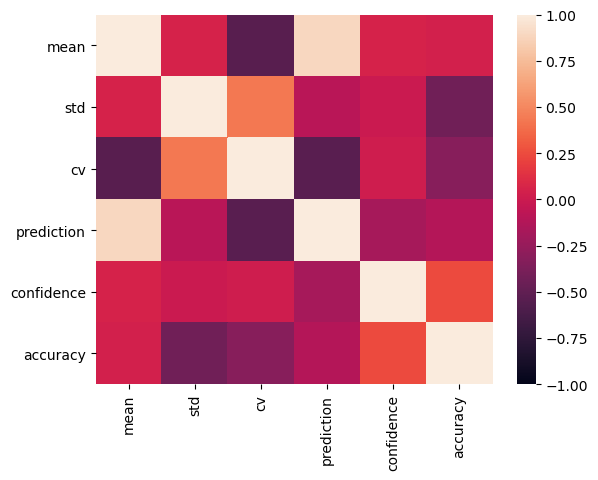

In [16]:
# fig,axis=plt.subplots(1,2)
sns.heatmap(cormat_meantohmm_reduce, vmin=-1, vmax=1)
# sns.heatmap(pvalues_meantohmm, vmax=0.05,ax=axis[1])
plt.show()

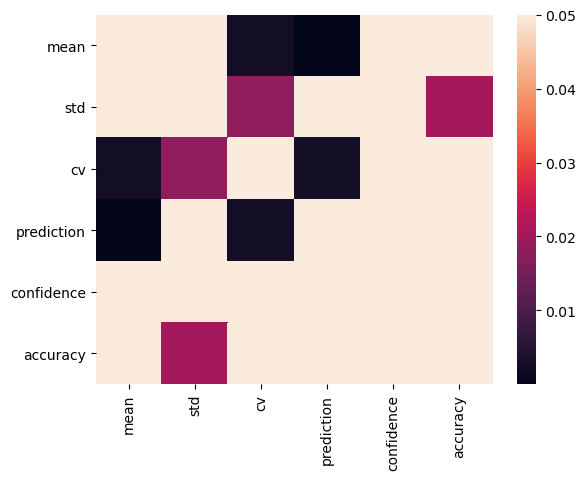

In [17]:
sns.heatmap(pvalues_meantohmm_reduce, vmax=0.05)
plt.show()

In [ ]:
correctred_pvalue_meantohmm_reduce=p_value_correction_square(pvalues_meantohmm_reduce.to_numpy(),0.05)
correctred_pvalue_meantohmm_reduce_df = pd.DataFrame(data = correctred_pvalue_meantohmm_reduce,\
    index = pvalues_meantohmm_reduce.index,\
        columns = pvalues_meantohmm_reduce.columns)
sns.heatmap(correctred_pvalue_meantohmm_reduce_df, vmax=0.05)
plt.show()

In [183]:
cor_matrix = np.array([
    [1.0,   0.002,  0.10,   0.003,  0.008],
    [0.002, 1.0,    0.005,  0.004,  0.01],
    [0.10,  0.005,  1.0,    0.4,    0.03],
    [0.003, 0.004,  0.4,    1.0,    0.04],
    [0.008, 0.01,   0.03,   0.04,   1.0]
])
# random_matrix = np.random.rand(5, 5)
# d=p_value_correction_square(cor_matrix,0.05)
# print("d:")
# print(d)
p_values_list = cor_matrix[np.triu_indices_from(cor_matrix, k=1)]
print(p_values_list)
b=fdrcorrection(p_values_list,0.05)
print(b[0])
[index for index,value in enumerate(b[0]) if value == True]

[0.002 0.1   0.003 0.008 0.005 0.004 0.01  0.4   0.03  0.04 ]
[ True False  True  True  True  True  True False  True  True]


[0, 2, 3, 4, 5, 6, 8, 9]

In [19]:
def p_value_correction_square_fdr(p_value_matrix,standard_alpha):
    p_values_list = p_value_matrix[np.triu_indices_from(p_value_matrix, k=1)]
    fdr_result=fdrcorrection(p_values_list,0.05)
    rejected_indices = [index for index,value in enumerate(fdr_result[0]) if value == True]
    # print("rejected_indices: "+str(rejected_indices))
    # print(p_values)
    # print(correlation_matrix)
    # Create a matrix to store the corrected significance levels
    corrected_matrix = np.ones_like(p_value_matrix)
    # print(corrected_matrix)
    # Populate the corrected significance levels in the matrix
    for index in rejected_indices:
        # print("index: "+str(index))
        tri_index=np.triu_indices_from(p_value_matrix, k=1)
        row=tri_index[0][index]
        col = tri_index[1][index]
        # print("row: "+str(row)+", col: "+str(col))
        corrected_matrix[row, col] = p_values_list[index]

    # Fill the lower triangular part of the matrix symmetrically
    corrected_matrix = corrected_matrix + corrected_matrix.T-np.ones_like(p_value_matrix)
    return corrected_matrix

cor_matrix = np.array([
    [1.0,   0.002,  0.10,   0.003,  0.008],
    [0.002, 1.0,    0.005,  0.004,  0.01],
    [0.10,  0.005,  1.0,    0.4,    0.03],
    [0.003, 0.004,  0.4,    1.0,    0.049],
    [0.008, 0.01,   0.03,   0.049,   1.0]
])
# random_matrix = np.random.rand(5, 5)
d=p_value_correction_square_fdr(cor_matrix,0.05)
print("d:")
print(d)

d:
[[1.    0.002 1.    0.003 0.008]
 [0.002 1.    0.005 0.004 0.01 ]
 [1.    0.005 1.    1.    0.03 ]
 [0.003 0.004 1.    1.    1.   ]
 [0.008 0.01  0.03  1.    1.   ]]


In [20]:
def p_value_correction_rectangle_fdr(p_value_matrix,standard_alpha):
    p_values_list = p_value_matrix.flatten()
    fdr_result=fdrcorrection(p_values_list,0.05)
    rejected_indices = [index for index,value in enumerate(fdr_result[0]) if value == True]
    # print(rejected_indices)
    # Create a matrix to store the corrected significance levels
    corrected_matrix = np.ones_like(p_value_matrix)
    # print(corrected_matrix)
    # Populate the corrected significance levels in the matrix
    # tri_index=np.triu_indices_from(p_value_matrix, k=1)
    num_rows, num_cols = p_value_matrix.shape
    x_indices, y_indices = np.meshgrid(np.arange(num_cols), np.arange(num_rows))
    tri_index = np.vstack((y_indices.flatten(),x_indices.flatten()))
    # print(tri_index)
    for index in rejected_indices:
        # print("index: "+str(index))
        row=tri_index[0][index]
        col = tri_index[1][index]
        # print("row: "+str(row)+", col: "+str(col))
        corrected_matrix[row, col] = p_values_list[index]

    # # Fill the lower triangular part of the matrix symmetrically
    # corrected_matrix = corrected_matrix 
    return corrected_matrix
cor_matrix = np.array([
    [0.002, 0.10],
    [0.003, 0.008],
    [0.005, 0.004],
    [0.01,  0.4],
    [0.03,  0.049]
])
# random_matrix = np.random.rand(5, 5)
d=p_value_correction_rectangle_fdr(cor_matrix,0.05)
print("d:")
print(d)

d:
[[0.002 1.   ]
 [0.003 0.008]
 [0.005 0.004]
 [0.01  1.   ]
 [0.03  1.   ]]


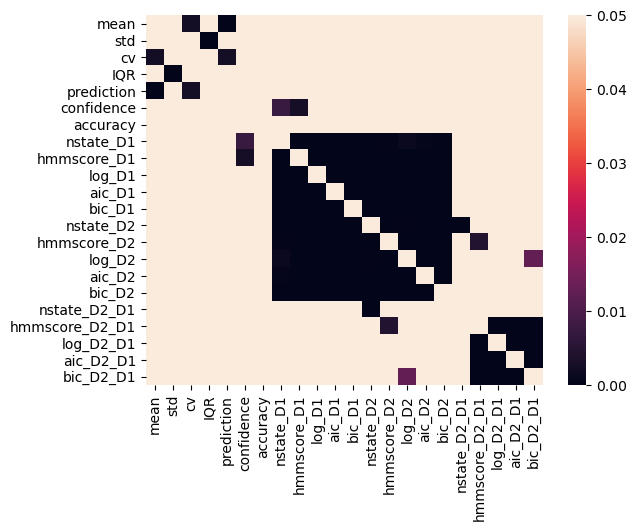

In [30]:
correctred_pvalue_meantohmm=p_value_correction_square_fdr(pvalues_meantohmm.to_numpy(),0.05)
correctred_pvalue_meantohmm_df = pd.DataFrame(data = correctred_pvalue_meantohmm,\
    index = pvalues_meantohmm.index,\
        columns = pvalues_meantohmm.columns)
sns.heatmap(correctred_pvalue_meantohmm_df, vmax=0.05)
plt.show()

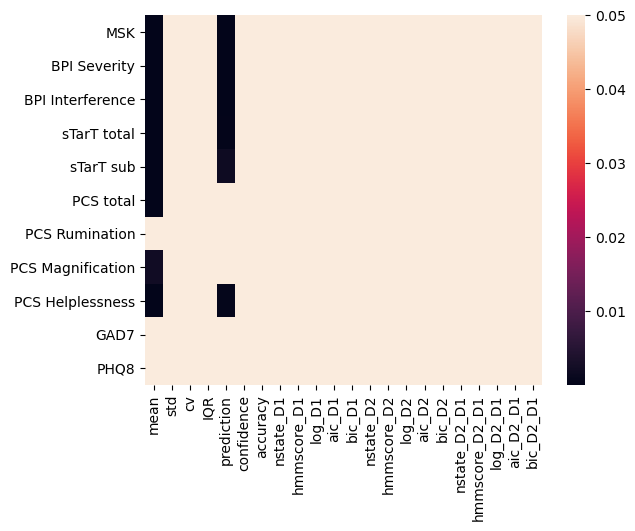

In [31]:
correctred_pvalue_paratoclinical=p_value_correction_rectangle_fdr(pvalues_paratoclinical.to_numpy(),0.05)
correctred_pvalue_paratoclinical_df = pd.DataFrame(data = correctred_pvalue_paratoclinical,\
    index = pvalues_paratoclinical.index,\
        columns = pvalues_paratoclinical.columns)
sns.heatmap(correctred_pvalue_paratoclinical_df, vmax=0.05)
plt.show()

In [44]:
clincal_basic_reduce=pd.DataFrame({
    'mean':mean_list,
    'std': std_list,
    'cv':cv_list,
    'iqr': IQR_list,
    'prediction':prediction_list,
    'confidence':confidence_list,
    'accuracy': acc_list,
    'nstate_D1':nstate_D1_list,
    'hmmscore_D1':hmmscore_D1_list,
    'nstate_D2':nstate_D2_list,
    'hmmscore_D2':hmmscore_D2_list,
    'BPI Severity':BPI_severity_list,
    'BPI Interference':BPI_interference_list,
    'PCS total':pcs_total_list,
    'PCS Rumination':pcs_rumination_list,
    'PCS Magnification':pcs_magnification_list,
    'PCS Helplessness':pcs_helplessness_list,
    'GAD7':GAD7_list,
    'PHQ8':PHQ8_list
    })
cormat_reduce = clincal_basic_reduce.corr()
pvalues_reduce = clincal_basic_reduce.corr(method=lambda x, y: pearsonr(x, y)[1])
# round(cormat,2)

In [46]:
cormat_basic_reduce=cormat_reduce.iloc[0:3,4:7:2]
cormat_basic_reduce.to_csv('../data/dataset/correlation_basic_reduce.csv')
pvalues_basic_reduce=pvalues_reduce.iloc[0:3,4:7:2]
pvalues_basic_reduce.to_csv('../data/dataset/pvalues_basic_reduce.csv')
round(pvalues_basic_reduce,2)

,prediction,accuracy
mean,0.00,0.83
std,0.66,0.02
cv,0.00,0.09


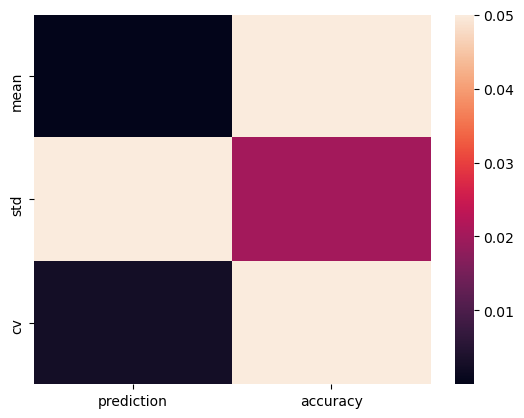

In [29]:
sns.heatmap(pvalues_basic_reduce, vmax=0.05)
plt.show()

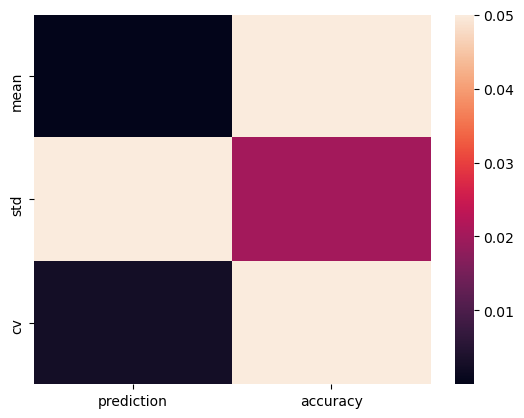

In [30]:
correctred_pvalue_basic_reduce=p_value_correction_rectangle_fdr(pvalues_basic_reduce.to_numpy(),0.05)
correctred_pvalue_basic_reduce_df = pd.DataFrame(data = correctred_pvalue_basic_reduce,\
    index = pvalues_basic_reduce.index,\
        columns = pvalues_basic_reduce.columns)
sns.heatmap(correctred_pvalue_basic_reduce_df, vmax=0.05)
plt.show()

In [49]:
cormat_basicvshmm_reduce=cormat_reduce.iloc[4:6,7:9]
cormat_basicvshmm_reduce.to_csv('../data/dataset/correlation_basicvshmm_reduce.csv')
pvalues_basicvshmm_reduce=pvalues_reduce.iloc[4:6,7:9]
pvalues_basicvshmm_reduce.to_csv('../data/dataset/pvalues_basicvshmm_reduce.csv')
round(pvalues_basicvshmm_reduce,2)

,nstate_D1,hmmscore_D1
prediction,0.03,0.05
confidence,0.01,0.00


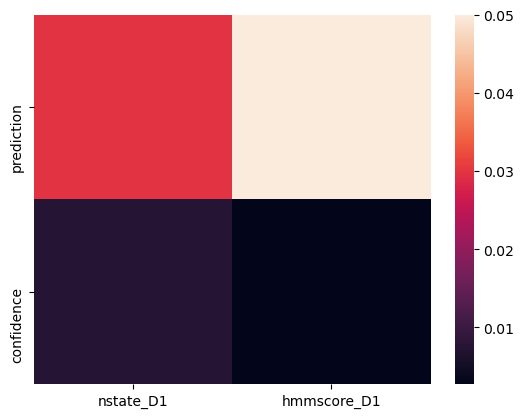

In [50]:
sns.heatmap(pvalues_basicvshmm_reduce, vmax=0.05)
plt.show()

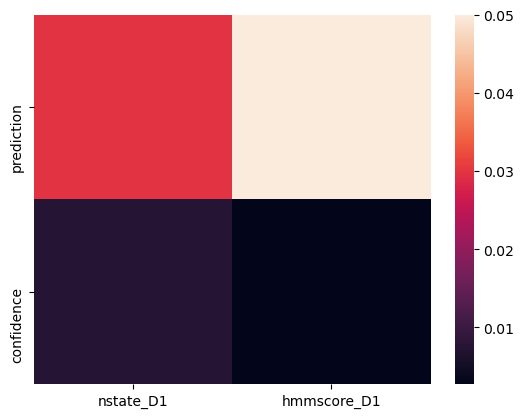

In [51]:
correctred_pvalue_basicvshmm_reduce=p_value_correction_rectangle_fdr(pvalues_basicvshmm_reduce.to_numpy(),0.05)
correctred_pvalue_basicvshmm_reduce_df = pd.DataFrame(data = correctred_pvalue_basicvshmm_reduce,\
    index = pvalues_basicvshmm_reduce.index,\
        columns = pvalues_basicvshmm_reduce.columns)
sns.heatmap(correctred_pvalue_basicvshmm_reduce_df, vmax=0.05)
plt.show()

In [56]:
cormat_basicvsclinical_reduce=cormat_reduce.iloc[2:5,11:17]
cormat_basicvsclinical_reduce.to_csv('../data/dataset/correlation_basicvsclinical_reduce.csv')
pvalues_basicvsclinical_reduce=pvalues_reduce.iloc[2:5,11:17]
pvalues_basicvsclinical_reduce.to_csv('../data/dataset/pvalues_basicvsclinical_reduce.csv')
round(pvalues_basicvsclinical_reduce,2)

,BPI Severity,BPI Interference,PCS total,PCS Rumination,PCS Magnification,PCS Helplessness
cv,0.01,0.01,0.19,0.50,0.18,0.1
iqr,0.28,0.05,0.01,0.04,0.03,0.0
prediction,0.00,0.00,0.01,0.05,0.03,0.0


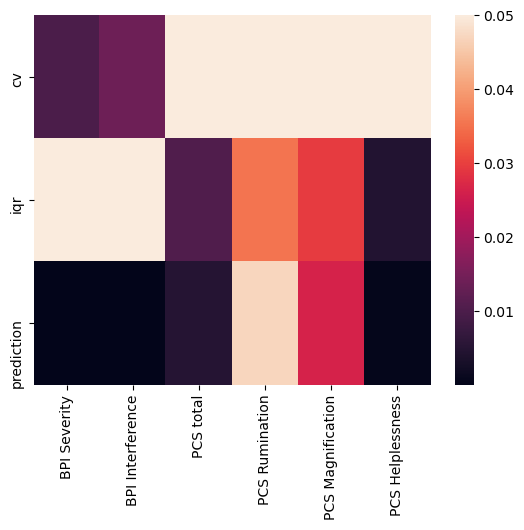

In [57]:
sns.heatmap(pvalues_basicvsclinical_reduce, vmax=0.05)
plt.show()

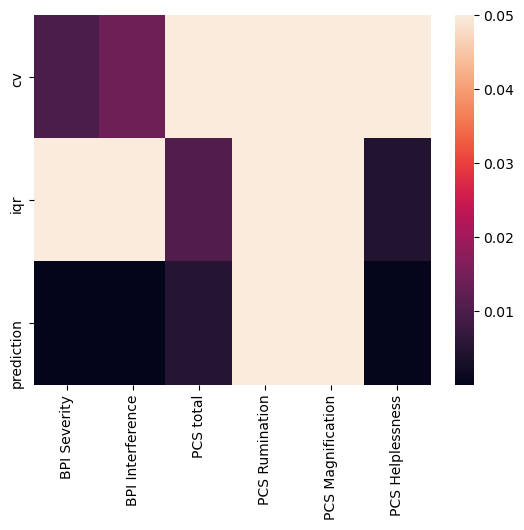

In [58]:
correctred_pvalue_basicvsclinical_reduce=p_value_correction_rectangle_fdr(pvalues_basicvsclinical_reduce.to_numpy(),0.05)
correctred_pvalue_basicvsclinical_reduce_df = pd.DataFrame(data = correctred_pvalue_basicvsclinical_reduce,\
    index = pvalues_basicvsclinical_reduce.index,\
        columns = pvalues_basicvsclinical_reduce.columns)
sns.heatmap(correctred_pvalue_basicvsclinical_reduce_df, vmax=0.05)
plt.show()

In [85]:
cormat_hmmvsclinical_reduce=cormat_reduce.iloc[7:9,11:17]
cormat_hmmvsclinical_reduce.to_csv('../data/dataset/correlation_hmmvsclinical_reduce.csv')
pvalues_hmmvsclinical_reduce=pvalues_reduce.iloc[7:9,11:17]
pvalues_hmmvsclinical_reduce.to_csv('../data/dataset/pvalues_hmmvsclinical_reduce.csv')
round(pvalues_hmmvsclinical_reduce,2)

,BPI Severity,BPI Interference,PCS total,PCS Rumination,PCS Magnification,PCS Helplessness
nstate_D1,0.31,0.16,0.07,0.17,0.09,0.05
hmmscore_D1,0.50,0.43,0.33,0.55,0.40,0.21


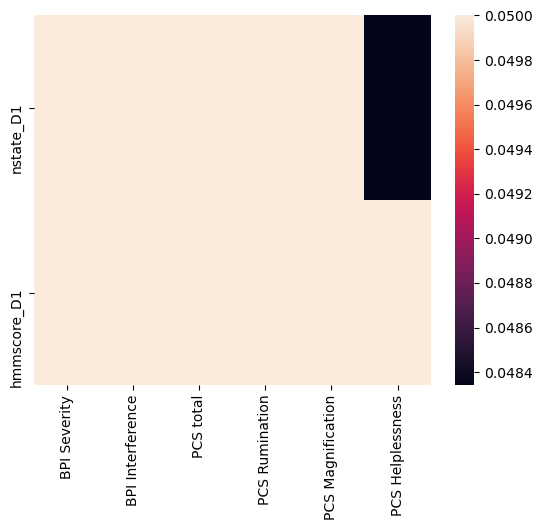

In [86]:
sns.heatmap(pvalues_hmmvsclinical_reduce, vmax=0.05)
plt.show()

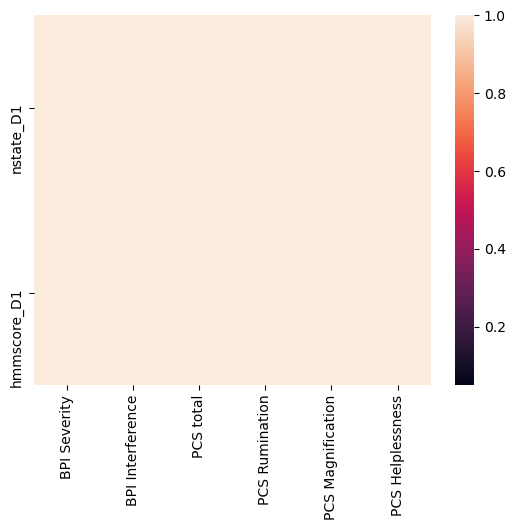

In [91]:
correctred_pvalue_hmmvsclinical_reduce=p_value_correction_rectangle_fdr(pvalues_hmmvsclinical_reduce.to_numpy(),0.05)
correctred_pvalue_hmmvsclinical_reduce_df = pd.DataFrame(data = correctred_pvalue_hmmvsclinical_reduce,\
    index = pvalues_hmmvsclinical_reduce.index,\
        columns = pvalues_hmmvsclinical_reduce.columns)
sns.heatmap(correctred_pvalue_hmmvsclinical_reduce_df, vmax=0.05)
plt.show()